# Effect of Heuristic on Search Efficiency

This project will show you how to solve planning problems -- Think logistics and scheduling -- using search and logic to find tractable solutions.  Classic planning problems can solve a problem where the rules are known and clear-cut.  In other words, they are _deterministic_.  Where to effects of an action are known to all, in AI, this is known as being _observable_.  In controlled environments, where change only occurs through the actions taken by a planning agent, these systems work well.  

Acting in these worlds can be modeled logically.  Actions can take place by first meeting all their preconditions.  And once completed, its effects known.  Imagine you are in charge of logistics at Fed Ex and need to find solutions for getting packages from place to place.  How could that be done?  To model the action of flying a package, we can use a [Planning Domain Definition Language](https://planning.wiki/) (PDDL).

```
Action(Fly, (plane, from, to)
    Precondition: At(plane, from) and Plane(from) and Airport(from) and Airport(to)
    Effect: not At(plane, from) and At(plane, to)
)
```

Propositional logic describes each action briefly.   Just add actions to represent new problems or new business domains.  Knowing that we have a starting state and goal state, a set of actions and costs associated with each action, allows us to apply search algorithms to find solutions.   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import make_dataclass
sns.set_theme(style="whitegrid")

In [2]:
Record = make_dataclass(
    "Record",
    [
        ("Problem", int),
        ("Alg_Num", int),
        ("Alg_Name", str),
        ("Heuristic", str),
        ("Actions", int),
        ("Expansions", int),
        ("Goal_Tests", int),
        ("New_Nodes", int),
        ("Length", int),
        ("Time", float),
    ],
)

## Experimental Results

I ran pypy to generate my experiments results using my mac desktop computer.  

In [3]:
dataset = [
    Record(1, 1, "BFS", "", 20, 43, 56, 178, 6, 0.0284),
    Record(1, 2, "DFS", "", 20, 21, 22, 84, 20, 0.0073),
    Record(2, 1, "BFS", "", 72, 3343, 4609, 30503, 9, 0.3459),
    Record(2, 2, "DFS", "", 72, 624, 625, 5602, 619, 0.4810),
    Record(4, 4, "Greedy", "h_unmet_goals", 104, 29, 31, 280, 18, 0.0612),
    Record(4, 11, "A*", "h_pg_setlevel", 104, 79863, 79865, 768641, 14, 30733.3346,),
    Record(3, 11, "A*", "h_pg_setlevel", 88, 12872, 12874, 115220, 12, 3046.3672),
    Record(1, 3, "UCS", "", 20, 60, 62, 240, 6, 0.0379),
    Record(1, 4, "Greedy", "h_unmet_goals", 20, 7, 9, 29, 6, 0.0032),
    Record(1, 5, "Greedy", "h_pg_levelsum", 20, 6, 8, 28, 6, 0.4590),
    Record(1, 6, "Greedy", "h_pg_maxlevel", 20, 6, 8, 24, 6, 0.1218),
    Record(1, 7, "Greedy", "h_pg_setlevel", 20, 13, 15, 53, 6, 1.2660),
    Record(1, 8, "A*", "h_unmet_goals", 20, 50, 52, 206, 6, 0.0216),
    Record(1, 9, "A*", "h_pg_levelsum", 20, 28, 30, 122, 6, 0.2154),
    Record(1, 10, "A*", "h_pg_maxlevel", 20, 43, 45, 180, 6, 0.1616),
    Record(1, 11, "A*", "h_pg_setlevel", 20, 46, 48, 192, 6, 0.7168),
    Record(2, 3, "UCS", "", 72, 5154, 5156, 46618, 9, 0.7450),
    Record(2, 4, "Greedy", "h_unmet_goals", 72, 17, 19, 170, 9, 0.0205),
    Record(2, 5, "Greedy", "h_pg_levelsum", 72, 9, 11, 86, 9, 0.4228),
    Record(2, 6, "Greedy", "h_pg_maxlevel", 72, 27, 29, 249, 9, 0.6970),
    Record(2, 7, "Greedy", "h_pg_setlevel", 72, 304, 306, 2846, 10, 54.8001),
    Record(2, 8, "A*", "h_unmet_goals", 72, 2467, 2469, 22522, 9, 0.7026),
    Record(2, 9, "A*", "h_pg_levelsum", 72, 357, 359, 3426, 9, 10.3350),
    Record(2, 10, "A*", "h_pg_maxlevel", 72, 2887, 2889, 26594, 9, 59.0657),
    Record(2, 11, "A*", "h_pg_setlevel", 72, 2879, 2881, 26622, 9, 577.1144),
    Record(3, 4, "Greedy", "h_unmet_goals", 88, 25, 27, 230, 15, 0.0519),
    Record(3, 6, "Greedy", "h_pg_maxlevel", 88, 21, 23, 195, 13, 1.8522),
    Record(4, 4, "Greedy", "h_unmet_goals", 104, 29, 31, 280, 18, 0.0615),
    Record(4, 6, "Greedy", "h_pg_maxlevel", 104, 56, 58, 580, 17, 3.6040),
    Record(3, 8, "A*", "h_unmet_goals", 88, 7388, 7390, 65711, 12, 1.2993),
    Record(3, 10, "A*", "h_pg_maxlevel", 88, 9580, 9582, 86312, 12, 331.0158),
    Record(4, 8, "A*", "h_unmet_goals", 104, 34330, 34332, 328509, 14, 4.0136),
    Record(4, 10, "A*", "h_pg_maxlevel", 104, 62077, 62079, 599376, 14, 3268.4160),
    Record(3, 2, "DFS", "", 88, 408, 409, 3364, 392, 0.2780),
    Record(4, 2, "DFS", "", 104, 25174, 25175, 228849, 24132, 771.7955),
]
df = pd.DataFrame(dataset) 




---

## Supporting Functions

In [4]:
def create_catplot(df, y_var, title, is_log=True):
    """Creates a categorical plot using Seaborn's catplot.
    
    Parameters:
        df: Dataframe contianing data to be plotted
        y_var: Name of column in dataframe used for y-axis values
        title: Title for the plot
    """
    
    g = sns.catplot(data=df, kind="bar", x="Problem", y=y_var, hue="Alg_Title", height=7,
                    aspect=1.0)
    g.despine(left=True, bottom=True)
    if is_log:
        g.set(yscale="log")
    g.ax.xaxis.grid(True, linewidth=0.25)
    g.ax.yaxis.grid(True, "minor", linewidth=0.25)
    g.despine(left=True, bottom=False)
    plt.title(title)

In [5]:
def create_relplot(df, y_var, title):
    """Creates a relational plot using Seaborn's catplot.
    
    Parameters:
        df: Dataframe contianing data to be plotted
        y_var: Name of column in dataframe used for y-axis values
        title: Title for the plot
    """

    g = sns.relplot(data=df, x="Actions", y=y_var, hue="Alg_Title", size="Problem",                             height=7, aspect=1.0, sizes=(40, 120)
    )
    g.set(yscale="log")
    g.ax.xaxis.grid(True, linewidth=0.25)
    g.ax.yaxis.grid(True, "minor", linewidth=0.25)
    g.despine(left=True, bottom=False)
    plt.title(title)


In [6]:
df["Alg_Title"] = df.Alg_Num.astype(str) + " " + df["Alg_Name"] + " " + df["Heuristic"]
df = df.sort_values(by=["Problem", "Alg_Num"])

---

## Analysis: Nodes vs Actions

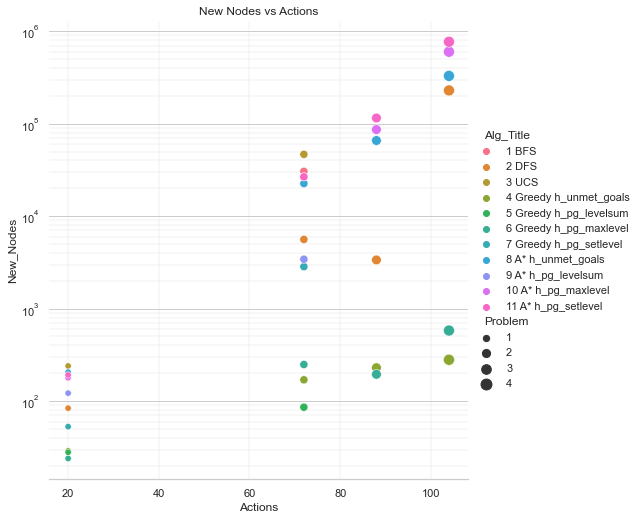

In [7]:
create_relplot(df, "New_Nodes", "New Nodes vs Actions")


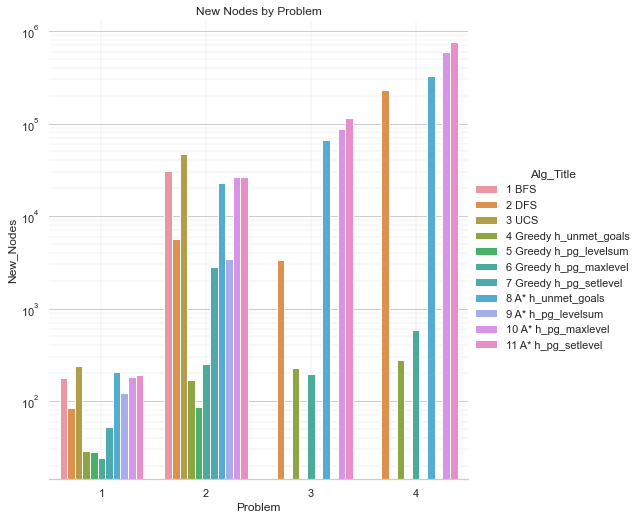

In [8]:
create_catplot(df, "New_Nodes", "New Nodes by Problem")

In [9]:
df[["Problem", "Alg_Title", "New_Nodes", "Actions"]].set_index("Problem").sort_values(by=["Problem", "New_Nodes"])

,Alg_Title,New_Nodes,Actions
Problem,,,
1,6 Greedy h_pg_maxlevel,24,20
1,5 Greedy h_pg_levelsum,28,20
1,4 Greedy h_unmet_goals,29,20
1,7 Greedy h_pg_setlevel,53,20
1,2 DFS,84,20
1,9 A* h_pg_levelsum,122,20
1,1 BFS,178,20
1,10 A* h_pg_maxlevel,180,20
1,11 A* h_pg_setlevel,192,20


### Discussion

Solving more complex problems requires more actions.  To solve the problems here, the number of actions grows linearly.   Finding the sequence of actions needed to reach the goal requires exponentially more new nodes as problem complexity increases.  When plotted logarithmically, exponential growth appears linearly, just as we see here.  The linear pattern occurs as logarithms and exponents are inverse functions.  One notable exception is the performance of depth-first search on problem 3 is an order of magnitude better than expected.  Repeated runs are consistent, so I imagine it has to do with the structure of the problem that allows DFS to find a solution with minimal backtracking.  

For all problems and heuristics, greedy algorithms outperform A* by needing fewer nodes to arrive at a solution.  A* has exponential growth in space complexity and puts A* at a disadvantage.  This especially true when the number of actions grows with the increased complexity of the problem.  Breadth-first search algorithms performed the worst -- as expected -- since its frontier size grows exponentially.   

---

## Analysis: Time vs Actions


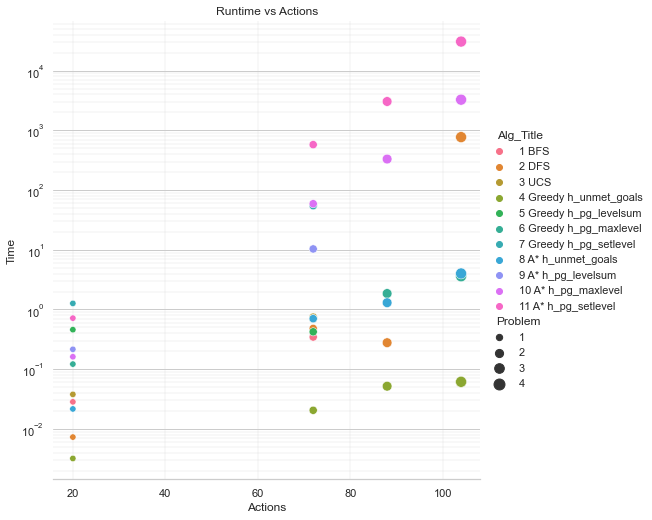

In [10]:
create_relplot(df, "Time", "Runtime vs Actions")


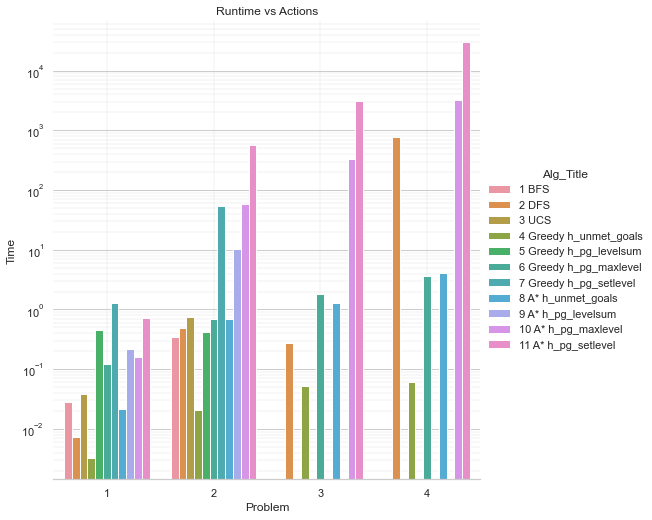

In [11]:
create_catplot(df, "Time", "Runtime vs Actions")

In [12]:
df[["Problem", "Alg_Title", "Time", "Actions"]].set_index("Problem").sort_values(by=["Problem", "Time"])

,Alg_Title,Time,Actions
Problem,,,
1,4 Greedy h_unmet_goals,0.0032,20
1,2 DFS,0.0073,20
1,8 A* h_unmet_goals,0.0216,20
1,1 BFS,0.0284,20
1,3 UCS,0.0379,20
1,6 Greedy h_pg_maxlevel,0.1218,20
1,10 A* h_pg_maxlevel,0.1616,20
1,9 A* h_pg_levelsum,0.2154,20
1,5 Greedy h_pg_levelsum,0.4590,20


### Discussion
Greedy search -- especially when using the h_unmet_goals heuristic -- finds solutions the fastest. The h_pg_setlevel heuristic is the slowest for all problems. For problem 1, which only requires 20 actions to solve, greedy search using the h_pg_setlevel is the slowest.  For all other problems, it is A* using this same heuristic. The h_pg_setlevel heuristic estimates:

> The set level of a planning graph is the first level where all goals appear such that no pair of goal literals are mutex in the last layer of the planning graph.

The h_pg_setlevel heuristic is known to perform poorly on complex problems, and here it lives up to its billing.

   


---

## Analysis: Length of plan by algorithm



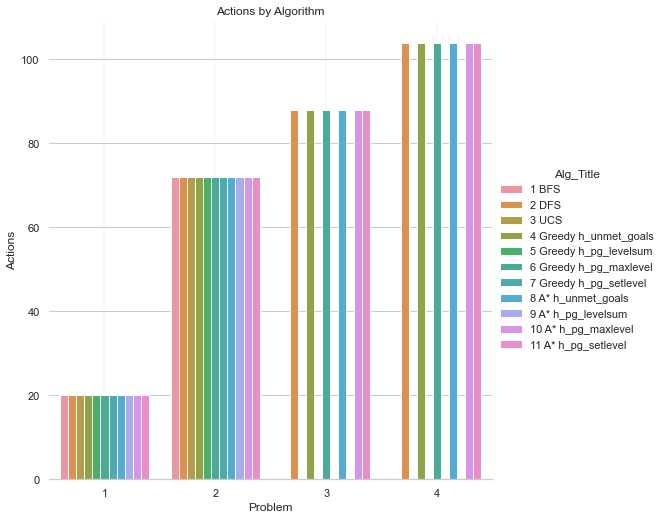

In [13]:
create_catplot(df, "Actions", "Actions by Algorithm", is_log=False)

In [14]:
df[["Problem", "Alg_Title", "Actions"]].set_index("Problem").sort_values(by=["Problem", "Actions"])

,Alg_Title,Actions
Problem,,
1,1 BFS,20
1,2 DFS,20
1,3 UCS,20
1,4 Greedy h_unmet_goals,20
1,5 Greedy h_pg_levelsum,20
1,6 Greedy h_pg_maxlevel,20
1,7 Greedy h_pg_setlevel,20
1,8 A* h_unmet_goals,20
1,9 A* h_pg_levelsum,20


### Discussion

The length of the plan required to arrive at the goal is consistent for all algorithms for each problem. The work to derive the plan -- measured in time expended of new nodes created -- varies considerably across algorithms. Why is this? Conflicting actions have been eliminated by only allowing actions that are not mutually exclusive. Mutually exclusive or mutex actions happen in three different ways.

1. _Inconsistent_ actions negate the effects of one another. For example, `Load(C, p)` and `Unload(C, p)`.

1. _Interference_ s when the effects of one action are mutually exclusive of the precondition of another.  For example, the actions `Fly(a, b)` and `At(a)` are _mutex_ since once flown to airport b.  The plane is no longer at airport a.

1. _Competing needs_ occur when the preconditions of one action interfere with the preconditions of the other.  One plane can only fly to one airport, so the actions `Fly(p, a, b)` and `Fly(P, a, c)` compete for the having the plane `At(a)`.

By eliminating mutex actions, the size of the resulting plan shrinks dramatically.

# Questions

1. _Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?_

> Based on my analysis of time vs. actions, I would select Greedy h_unmet_goals or DFS because they performed the best for small problems (i.e., problem 1). Both completed their search in less than one-hundredth of a second, an order of magnitude faster than A* h_unmet_goals.

2. _Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)_

> Greedy h_unmet_goals is by far the best choice for large problem domains (i.e., problem 4). Other choices are Greedy h_pg_maxlevel or A* h_unmet_goals, but they are three orders of magnitude slower. 


3. _Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?_

> A planning graph is a tree with its root at the initial state. Actions are the branches of the tree and whose effects result in a new state. A* is guaranteed to return an optimal plan when searching a tree using an admissible heuristic. Heuristics are estimates of the cost measured in the number of new states from the initial state. An admissible heuristic will always be less than or equal to the actual cost. Of the heuristics considered in this analysis, here are those that are admissible:

* The h_pg_maxlevel heuristic is the largest level-cost needed to achieve any one of the goal's conditions.

* The h_pg_setlevel heuristic is the level where all the goal's conditions are achieved.

> So, to find optimal plans use either A*_h_pg_setlevel or A*_h_pg_maxlevel. In my results, A*_h_pg_setlevel is about 10 faster than A*_h_pg_maxlevel for all problems analyzed in this exercise. So, choose A*_h_pg_setlevel for an optimal plan in the least amount of time.

BFS, too, will return an optimal plan creating an exponentially expanding number of nodes in the process, so it consumes a lot of memory and time. 

### Cite

Russell, S. J., & Norvig, P. (2010). Artificial intelligence: A modern approach (3rd ed.). Upper Saddle River: Prentice-Hall.  Chapter 3 - Solving Problems by Searching and Chapter 10 - Classical Planning.